# TASK #1: UNDERSTAND THE PROBLEM STATMENT AND BUSINESS CASE


The goal of this project is to develop
a translator using Atrificial Intelligence (AI).
Language translation is a key service that is used
by travelers as well as for people who may be settling into a new country. Familiarity with Recurrent Neural Networks (RNN) will be a helpful basis.

In this project, we will build an AI model based on Recurrent Neural Networks (RNN) using Long Short Term Memory (LSTM) networks. This model translates a small set of vocabulary from the English language to the French language.


# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:

!pip install --upgrade tensorflow-gpu == 2.0


Requirement already up-to-date: tensorflow-gpu==2.0 in c:\users\administrator\anaconda31\lib\site-packages (2.0.0)


In [ ]:

# install nltk
!pip install nltk

# install gensim
!pip install gensim

# install spacy
!pip install spacy
!pip install plotly


In [ ]:

import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot

# Ensure that we are able to see the x and y axes clearly
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)


In [ ]:

# Load the data
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])


C:\Users\Administrator\anaconda31\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\Administrator\anaconda31\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

# View the text data
df_english
df_french

# Dataframe information
df_english.info
df_french.info()

# Check for null values
df_english.isnull().sum()
df_french.isnull().sum()


In [ ]:

# Concatenate both dataframes
df = pd.concat([df_english, df_french], axis = 1)
df


english  \
0       new jersey is sometimes quiet during autumn , ...   
1       the united states is usually chilly during jul...   
2       california is usually quiet during march , and...   
3       the united states is sometimes mild during jun...   
4       your least liked fruit is the grape , but my l...   
...                                                   ...   
137855  france is never busy during march , and it is ...   
137856  india is sometimes beautiful during spring , a...   
137857  india is never wet during summer , but it is s...   
137858  france is never chilly during january , but it...   
137859  the orange is her favorite fruit , but the ban...   

                                                   french  
0       new jersey est parfois calme pendant l' automn...  
1       les Ã©tats-unis est gÃ©nÃ©ralement froid en ju...  
2       california est gÃ©nÃ©ralement calme en mars , ...  
3       les Ã©tats-unis est parfois lÃ©gÃ¨re en juin ,...  
4       votre moins aimÃ© fruit est le raisin , mais m...  
...                                                   ...  
137855  la france est jamais occupÃ©e en mars , et il ...  
137856  l' inde est parfois belle au printemps , et il...  
137857  l' inde est jamais mouillÃ© pendant l' Ã©tÃ© ,...  
137858  la france est jamais froid en janvier , mais i...  
137859  l'orange est son fruit prÃ©fÃ©rÃ© , mais la ba...  

[137860 rows x 2 columns]

In [ ]:
# Print the number records for each language

print("Total English Records = {}".format(len(df['english'])))
print("Total French Records = {}".format(len(df['french'])))


Total English Records = 137860
Total French Records = 137860


# TASK #3: PERFORM DATA CLEANING

In [ ]:

# download nltk packages
nltk.download('punkt')

# download stopwords
nltk.download("stopwords")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

# function to remove punctuations
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)


In [ ]:

df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)


In [ ]:
english_words = []
french_words  = []

In [ ]:

# Function to get the list of unique words
def get_label_superset(x, word_list):

    for label in x.split():

        if label not in word_list:

            word_list.append(label)


df['english'].apply(lambda x: get_label_superset(x, english_words))
df['french'].apply(lambda x: get_label_superset(x, french_words))


In [ ]:
# Number of unique words in English

total_english_words  = len(english_words)
total_english_words


199

In [5]:

# Number of unique words in French

total_french_words = len(french_words)
total_french_words


# TASK #4: VISUALIZE CLEANED UP DATASET

In [ ]:

# Obtain list of all words in the dataset
words = []

for i in df['english']:

  for word in i.split():

    words.append(word)

words


['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [ ]:

# Obtain the total count of words

english_words_counts = Counter(words)
english_words_counts


Counter({'new': 12197,
         'jersey': 11225,
         'is': 205858,
         'sometimes': 37746,
         'quiet': 8693,
         'during': 74933,
         'autumn': 9004,
         'and': 59850,
         'it': 75137,
         'snowy': 8898,
         'in': 75525,
         'april': 8954,
         'the': 67628,
         'united': 11270,
         'states': 11270,
         'usually': 37507,
         'chilly': 8770,
         'july': 8956,
         'freezing': 8928,
         'november': 8951,
         'california': 11250,
         'march': 9023,
         'hot': 8639,
         'june': 9133,
         'mild': 8743,
         'cold': 8878,
         'september': 8958,
         'your': 9734,
         'least': 27564,
         'liked': 14046,
         'fruit': 27192,
         'grape': 4848,
         'but': 63987,
         'my': 9700,
         'apple': 4848,
         'his': 9700,
         'favorite': 28332,
         'orange': 4848,
         'paris': 11334,
         'relaxing': 8696,
         'decem

In [ ]:

# Sort the dictionary by values

english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)


In [ ]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [ ]:

# Append the values to a list for visualization purposes
english_words = []
english_counts = []

for i in range(len(english_words_counts)):

  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])


In [ ]:

english_words


['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [ ]:

english_counts


[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

In [ ]:

# Plot barplot using plotly
fig = px.bar(x = english_words, y = english_counts)
fig.show()


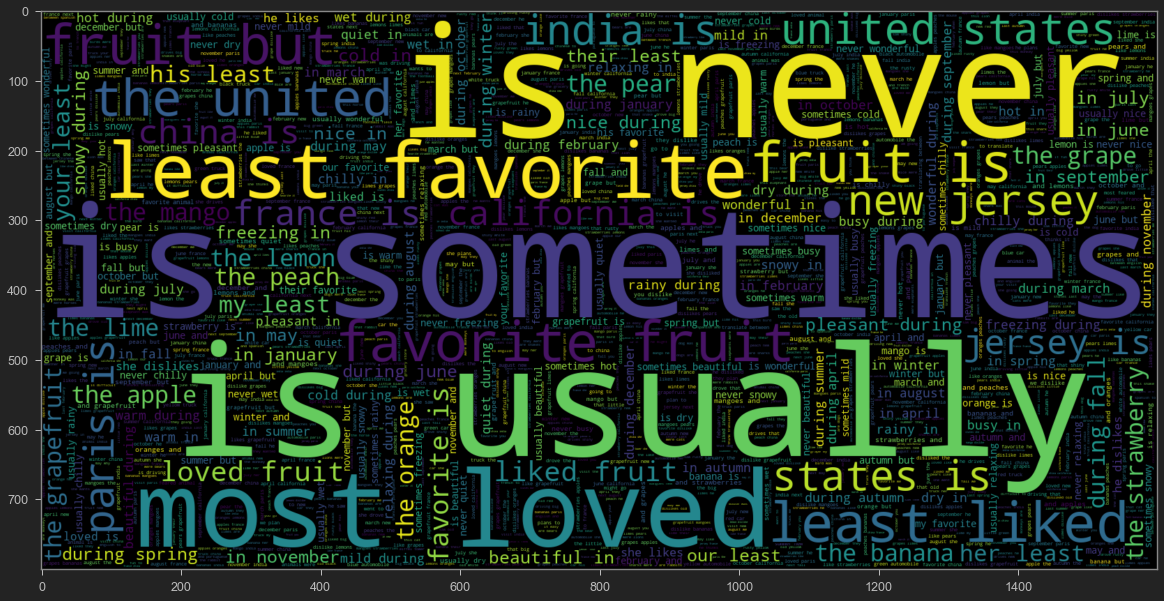

In [ ]:

# Plot the word cloud for text that is Real

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')


In [ ]:
df.english[0]
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [ ]:

# Maximum number of words per document for embeddings
maxlen_english = -1

for doc in df.english:

    tokens = nltk.word_tokenize(doc)

    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)

print("The maximum number of words in any document = ", maxlen_english)


The maximum number of words in any document =  15


In [ ]:

# obtain the count of french words
words = []

for i in df['french']:

  for word in i.split():

    words.append(word)

words


['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril',
 'les',
 'Ã©tats-unis',
 'est',
 'gÃ©nÃ©ralement',
 'froid',
 'en',
 'juillet',
 'et',
 'il',
 'gÃ¨le',
 'habituellement',
 'en',
 'novembre',
 'california',
 'est',
 'gÃ©nÃ©ralement',
 'calme',
 'en',
 'mars',
 'et',
 'il',
 'est',
 'gÃ©nÃ©ralement',
 'chaud',
 'en',
 'juin',
 'les',
 'Ã©tats-unis',
 'est',
 'parfois',
 'lÃ©gÃ¨re',
 'en',
 'juin',
 'et',
 'il',
 'fait',
 'froid',
 'en',
 'septembre',
 'votre',
 'moins',
 'aimÃ©',
 'fruit',
 'est',
 'le',
 'raisin',
 'mais',
 'mon',
 'moins',
 'aimÃ©',
 'est',
 'la',
 'pomme',
 'son',
 'fruit',
 'prÃ©fÃ©rÃ©',
 'est',
 "l'orange",
 'mais',
 'mon',
 'prÃ©fÃ©rÃ©',
 'est',
 'le',
 'raisin',
 'paris',
 'est',
 'relaxant',
 'en',
 'dÃ©cembre',
 'mais',
 'il',
 'est',
 'gÃ©nÃ©ralement',
 'froid',
 'en',
 'juillet',
 'new',
 'jersey',
 'est',
 'occupÃ©',
 'au',
 'printemps',
 'et',
 'il',
 'est',
 'jamais',
 'chaud

In [ ]:

# Obtain the total count of words

french_words_counts = Counter(words)
french_words_counts


Counter({'new': 11047,
         'jersey': 11052,
         'est': 196809,
         'parfois': 37746,
         'calme': 7256,
         'pendant': 10741,
         "l'": 32917,
         'automne': 14727,
         'et': 59851,
         'il': 84079,
         'neigeux': 1867,
         'en': 105768,
         'avril': 8954,
         'les': 65255,
         'Ã©tats-unis': 11210,
         'gÃ©nÃ©ralement': 31292,
         'froid': 16794,
         'juillet': 8956,
         'gÃ¨le': 3622,
         'habituellement': 6215,
         'novembre': 8951,
         'california': 3061,
         'mars': 9023,
         'chaud': 16405,
         'juin': 9133,
         'lÃ©gÃ¨re': 63,
         'fait': 2916,
         'septembre': 8958,
         'votre': 9368,
         'moins': 27557,
         'aimÃ©': 25852,
         'fruit': 23626,
         'le': 35306,
         'raisin': 4852,
         'mais': 63987,
         'mon': 9403,
         'la': 49861,
         'pomme': 4848,
         'son': 16496,
         'prÃ©fÃ©rÃ©': 

In [ ]:

# Sort the dictionary by values

french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)


In [ ]:

french_words_counts


[('est', 196809),
 ('en', 105768),
 ('il', 84079),
 ('les', 65255),
 ('mais', 63987),
 ('et', 59851),
 ('la', 49861),
 ('parfois', 37746),
 ('jamais', 37215),
 ('le', 35306),
 ("l'", 32917),
 ('gÃ©nÃ©ralement', 31292),
 ('moins', 27557),
 ('aimÃ©', 25852),
 ('au', 25738),
 ('fruit', 23626),
 ('prÃ©fÃ©rÃ©', 23305),
 ('agrÃ©able', 17751),
 ('froid', 16794),
 ('son', 16496),
 ('chaud', 16405),
 ('de', 15070),
 ('plus', 14934),
 ('automne', 14727),
 ('mois', 14350),
 ('Ã', 13870),
 ('elle', 12056),
 ('citrons', 11679),
 ('paris', 11334),
 ('inde', 11277),
 ('Ã©tats-unis', 11210),
 ('france', 11170),
 ('jersey', 11052),
 ('new', 11047),
 ('chine', 10936),
 ('pendant', 10741),
 ('pamplemousse', 10140),
 ('mon', 9403),
 ('votre', 9368),
 ('juin', 9133),
 ('printemps', 9100),
 ('janvier', 9090),
 ('hiver', 9038),
 ('mars', 9023),
 ('Ã©tÃ©', 8999),
 ('mai', 8995),
 ('septembre', 8958),
 ('juillet', 8956),
 ('avril', 8954),
 ('novembre', 8951),
 ('dÃ©cembre', 8945),
 ('fÃ©vrier', 8942),
 ('octob

In [ ]:

# Append the values to a list for visualization purpose

french_words = []
french_counts = []

for i in range(len(french_words_counts)):

  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

In [ ]:

fig = px.bar(x = french_words, y = french_counts)
fig.show()


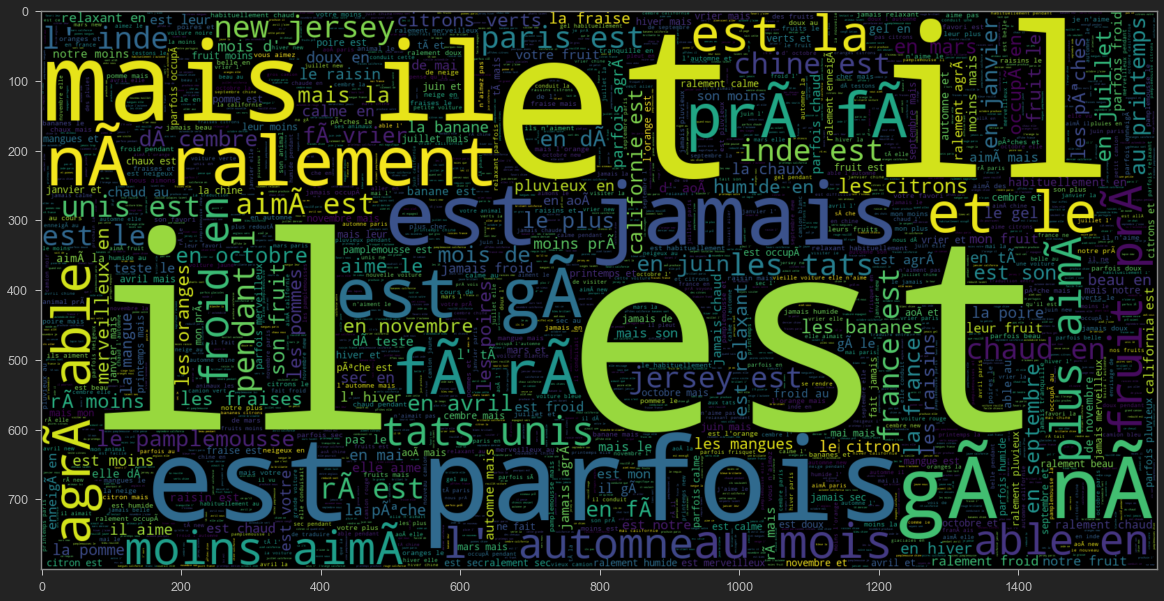

In [ ]:

# Plot the word cloud for French

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')


In [ ]:

# Maximum number of words per document for embeddings
maxlen_french = -1

for doc in df.french:

    tokens = nltk.word_tokenize(doc)

    if(maxlen_french < len(tokens)):

        maxlen_french = len(tokens)

print("The maximum number of words in any document = ", maxlen_french)


The maximum number of words in any document =  24


# TASK #5: PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

In [ ]:

def tokenize_and_pad(x, maxlen):

  #  A tokenier to tokenize the words and create sequences of tokenized words
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')

  return tokenizer, sequences, padded


In [ ]:

# Tokenize and pad the data
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)


In [ ]:

# Total vocab size for English

english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)


Complete English Vocab Size: 200


In [ ]:

# Total vocab size for French

french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)


Complete French Vocab Size: 351


In [ ]:

print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])


The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [ ]:

print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])


The tokenized version for document
 l'orange est son fruit prÃ©fÃ©rÃ©  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:

# Function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])


In [ ]:

pad_to_text(y_padded[0], y_tokenizer)


"new jersey est parfois calme pendant l' automne et il est neigeux en avril          "

In [ ]:

# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)


In [ ]:

# tokenize and pad the data
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_french)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)


# TASK #8: BUILD AND TRAIN THE MODEL

In [7]:

# Sequential Model
model = Sequential()

# Embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))

# Encoder
model.add(LSTM(256))

# Decoder
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences = True ))

model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()


NameError: name 'Sequential' is not defined

In [ ]:

# Change the shape of the target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape


(124074, 24, 1)

In [ ]:

# Train the model
model.fit(x_train, y_train, batch_size = 1024, validation_split = 0.1, epochs = 10)


Train on 111666 samples, validate on 12408 samples
Epoch 1/10
111666/111666 [==============================] - 530s 5ms/sample - loss: 2.5934 - accuracy: 0.5182 - val_loss: 2.0197 - val_accuracy: 0.5638
Epoch 2/10
111666/111666 [==============================] - 506s 5ms/sample - loss: 1.8454 - accuracy: 0.5887 - val_loss: 1.6762 - val_accuracy: 0.5937
Epoch 3/10
107520/111666 [===========================>..] - ETA: 18s - loss: 1.4787 - accuracy: 0.6223

KeyboardInterrupt: 

In [ ]:

# Save the model
model.save("weights.h5")


MINI CHALLENGE #6:
- Train the model with different embedding output dimension and comment on model performance during training


In [ ]:

# Sequential Model
model = Sequential()

# Embedding layer
model.add(Embedding(english_vocab_size, 128, input_length = maxlen_english, mask_zero = True))

# Encoder
model.add(LSTM(256))

model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))

model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer = 'adam'(lr = 1e-3), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()


# TASK #9: ASSESS TRAINED MODEL PERFORMANCE


In [ ]:

# Function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):

    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in np.argmax(predictions, 1)])


In [ ]:

for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))



## Further Exploration

I am curious to see this project modified and expanded to include the top 1000 used words/signs in French, Spanish, Mandarin, Egyptian Arabic and American Sign Language (ASL).
